# How do developers communicate about security? 
By: Kate Eselius (keselius) and Sasha Ronaghi (sronaghi)



# Project Overview

Last year, both of us took CS155 - Computer and Network Security. In this class we learned that security is a topic that all developers must consider. From our own experience, we know that StackOverflow is commmonly used among developers for help on computer science-related questions. We were explicitly taught **not** to copy code from StackOverflow due to the presence of many security-related bugs on the website. But, we know that using StackOverflow is inevitable. So we want to know, **how is security discussed on Stack Overflow?**

To better understand this question, we explore these following questions in our dataset: 


*   What percentage of content contains security-related topics? How does this percentage differ for questions, answers, and comments? 
*   Where is the location of security-related content in a thread?
*   What tags are associated with security?
*   How many users include security in their profiles? What are the demographics of these users?
*   How popular are security-related questions, answers, and comments? How does their popularity compare to the non-security counterparts? 
* How many security related posts are reaching large audiences? How is the view count of questions impacted by security presence?
*   What security topics are the most and least popular? 
*   Do comments, answers and posts discuss the same security topics? 
* Does popularity of specific security attacks correlate with current events (when they were first discovered or when they were most famously exploited)?  
*   Can we predict how popular a post question is based on if it has security content among other factors? 






# Analysis of Datasets


We are using two three main datasets all within the stackoverflow database. We also generated our terms list which we define as a dataset. 



## Stackoverflow Dataset
This dataset includes tables about posts, users, and different feautures such as votes and users. The main tables that we use are the following 


*   comments - This table provides information on comments made on both questions and answers. (16.03 GB)
*   post_answers - This table provides information on the answers made to posts. (28.62 GB)
*   post_questions - This table provides information on questions made by users. (37.17 GB)
*   tags - This table includes the tags and related posts. (2.48 MB) 
*   users - This table provides information on the users. (3.14 GB)


Importantly, the tables are too large to query within our billing limits. Often, we sample the data to make manageable queries. Thus, the numbers aren't exactly represantative of dataset, but rather the general trends. This also causes an issue with matching on ids with the dataset. For example, a comment associated with a post may not be in the sampled table of comments, even if it exists. 


Here is a schematic outlining different features in the tables and how they are related. Post Questions have post answers and you can comment on both questions and answers. There is no overlap between post answers and comments since comments and answers are treated separately. 

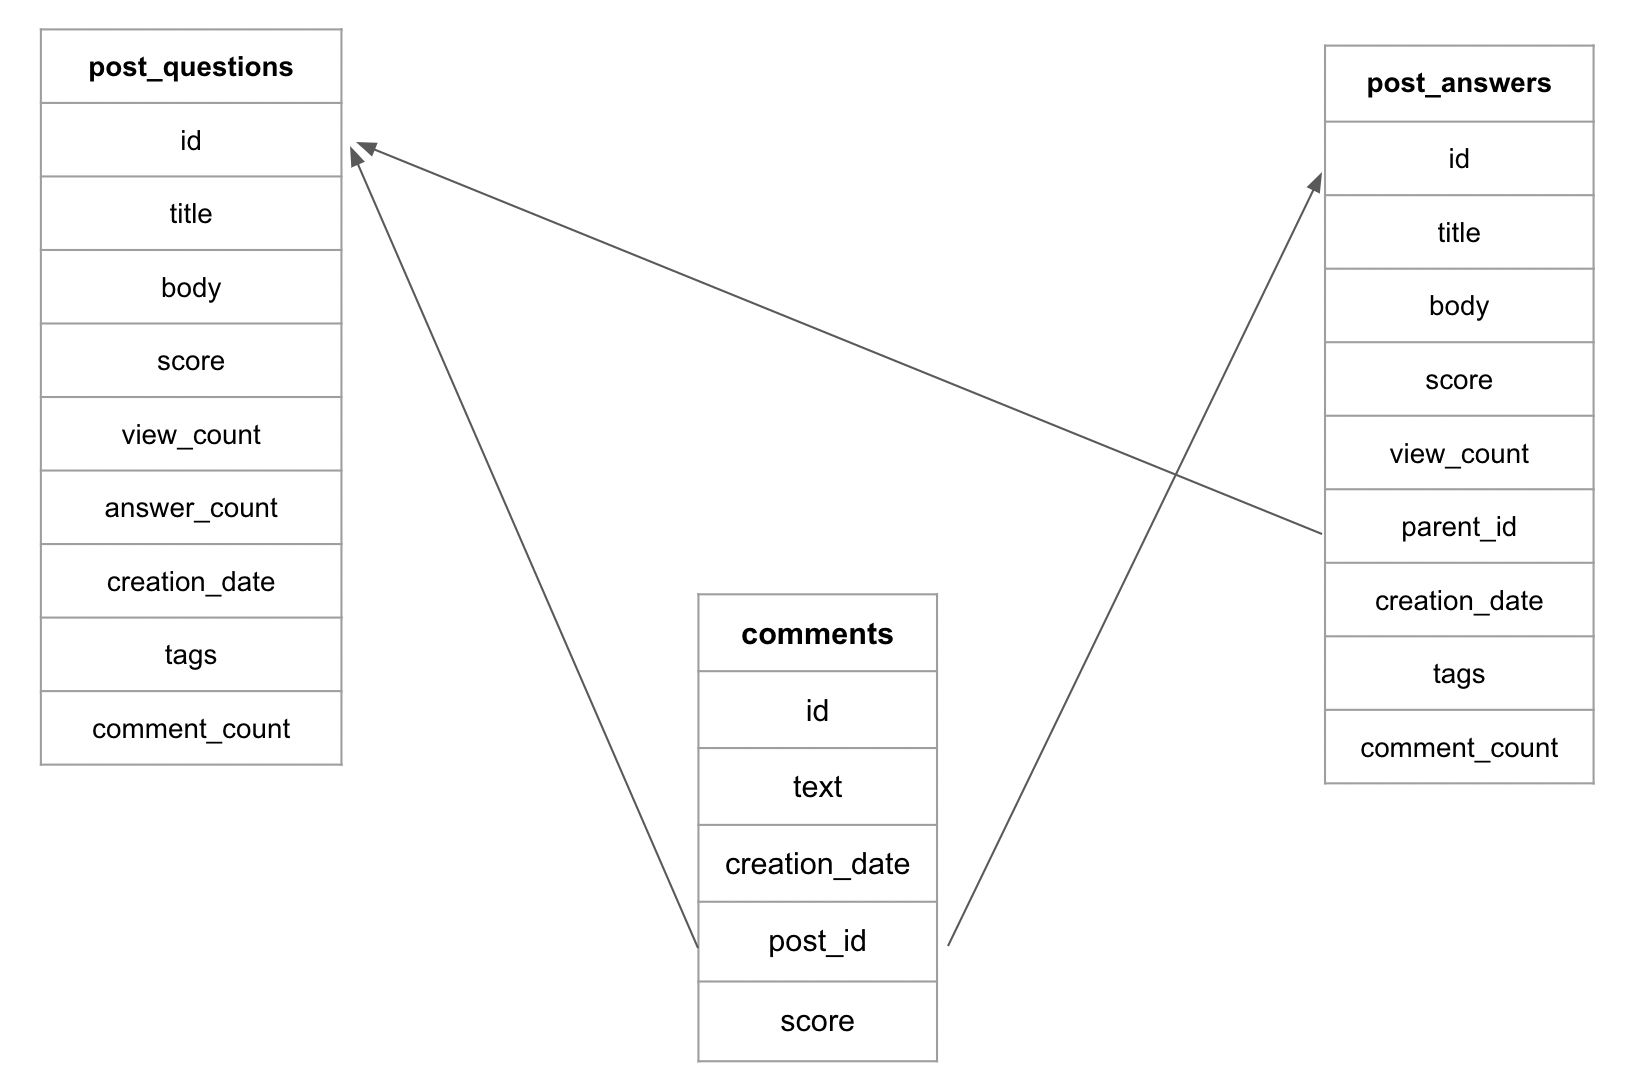

## Security Terms Dataset
We used two main methods to generate our list of security terms: 

1.   CS 155
* We used course materials from CS 155 (Computer and Network Security) to generate our list of words. All topics, key definitions, and discussion points were compiled in a list in order to create our starting running list of security related topics.
2.   Chat Bots
* Adding on from our current list, we used chat bots to add additional terms. We asked different models of ChatGPT to generate a list of topics related to cybersecurity.

To generate our matches we also make use of two fundamental NLP methods: 


1.   Stemming
* We applied the idea of stemming to our list of words in order to maximize the number of matches for a core concept without having to worry about tense and different endings. For example, "vulnerability" is stemmed down to "vulner" so that we can match on "vulnerability," "vulnerable," "vulnerabilities" and so forth.
2.   Patial Matches with fuzzing 
* Additionally, we make use of the function REGEXP_CONTAINS which uses a partial matching algorithm. It uses fuzzy matching in order to capture high probability matches that are not exact matches to our list of words. This can help with spelling mistakes in posts, tense issues and more. 

In [ ]:
# NOTE: do not run this
# These python functions show how we
# manipulated our list of terms to create our Regex expression. 
import nltk
import csv
import sys

def no_stemming(): 

	words = []

	with open('/Users/kateeselius/Documents/CS145/CVE.csv') as csvfile:    
		csvReader = csv.reader(csvfile)    
		for row in csvReader:        
			words.append(row[0])        

	ps = nltk.PorterStemmer()

	stemmed = ""
	for w in words:
		tokens = nltk.word_tokenize(w)
		stemmed_phrase = ""
		for t in tokens: 
			stemmed_piece = t.lower()
			#ps.stem(t)
			if t == tokens[-1]: 
				stemmed_phrase += stemmed_piece
			else: 
				stemmed_phrase += stemmed_piece + " "
		stemmed += stemmed_phrase + "|"

	stemmed = stemmed[0:len(stemmed) - 1] #gets rid of last or 
	print(stemmed)

def stemming(): #for exact matches 
	words = []

	with open('/Users/kateeselius/Documents/CS145/CVE.csv') as csvfile:    
		csvReader = csv.reader(csvfile)    
		for row in csvReader:        
			words.append(row[0])        

	ps = nltk.PorterStemmer()

	stemmed = ""
	for w in words:
		tokens = nltk.word_tokenize(w)
		stemmed_phrase = ""
		for t in tokens: 
			stemmed_piece = ps.stem(t)
			if t == tokens[-1]: 
				stemmed_phrase += stemmed_piece
			else: 
				stemmed_phrase += stemmed_piece + " "
		stemmed += stemmed_phrase + "|"

	stemmed = stemmed[0:len(stemmed) - 1] #gets rid of last or 
	print(stemmed) 



if __name__ == '__main__':
    globals()[sys.argv[1]]()



Stemmed regex: 

'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\''


non-stemmed regex: 

'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\''

# Data Exploration

## Notes 



*   **Coloring**: purple - questions, green - answers, cyan - comments, blue - user informaiton, grey - non-security, dark teal - both question and answers 
*   **Sampling**: Often, we must use a subset of the underlying tables in order to be within the computation limit. In most instances, we sample 10% of the rows from the original table in order to run our queries.  



## Dependencies and Setup

In [ ]:
# Visualization libraries 
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [ ]:
# Authenticate to BigQuery
from google.colab import auth
auth.authenticate_user()
#project_id = "cs145-sasha" #Sasha's ID 
project_id = "calcium-land-364517" #Kate's ID 

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

## Preview Data 
This is an example of questions that would appear with security related terms 

In [ ]:
%%bigquery --project $project_id
WITH terms AS ( SELECT
'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\'' as regex_str)

SELECT  body, array_length((REGEXP_EXTRACT_ALL(posts.body, terms.regex_str))) as num_exact_matches
FROM (SELECT body FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE SYSTEM (10 PERCENT)) AS posts, terms
WHERE REGEXP_EXTRACT_ALL(posts.body, terms.regex_str) is not NULL
ORDER BY num_exact_matches DESC
LIMIT 10 

Query is running:   0%|          |

Downloading:   0%|          |

,body,num_exact_matches
0,<p>Trying to run <code>make dev</code> on a py...,375
1,<p>I'm working on an application that implemen...,307
2,<p>While trying to install paramiko on my fedo...,191
3,<p>I am getting some error while sorting my d...,190
4,<p>I'm using two versions of java JDK provided...,165
5,<p>I have been trying to get the Spring SAML S...,157
6,<p>I found a lot of examples for self signed X...,152
7,<p>I am getting below exception while loading ...,150
8,<p>my problem is to set the collection type Se...,149
9,<p>I am doing binary code rewriting. The reaso...,148


## Content Containing security-related topics
What percentage of content contains security-related topics? How does this percentage differ for questions, answers, and comments?

For each of these queries, we sample 10% of the overall data in order to effienctly arrive at an estimation.

### Percent of questions containing security related topics

In [ ]:
%%bigquery q_percent --project $project_id

WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)

SELECT (COUNT(*) / (23020127 *.1))* 100 as percent
FROM (SELECT body FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE SYSTEM (10 PERCENT)) AS posts, terms
WHERE REGEXP_CONTAINS(posts.body, terms.regex_str)


Query is running:   0%|          |

Downloading:   0%|          |

### Percent of answers containing security related topics

In [ ]:
%%bigquery a_percent --project $project_id

WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)

SELECT (COUNT(*) / (34024119 * .1)) * 100 as percent
FROM (SELECT body FROM `bigquery-public-data.stackoverflow.posts_answers` TABLESAMPLE SYSTEM (10 PERCENT)) AS answers, terms
WHERE REGEXP_CONTAINS(answers.body, terms.regex_str)



Query is running:   0%|          |

Downloading:   0%|          |

### Percent of comments containing security related topics 

In [ ]:
%%bigquery c_percent --project $project_id 

WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)

SELECT (COUNT(*) / (86754111 * .1)) * 100 as percent
FROM (SELECT text FROM `bigquery-public-data.stackoverflow.comments` TABLESAMPLE SYSTEM (10 PERCENT)) AS comments, terms
WHERE REGEXP_CONTAINS(comments.text, terms.regex_str)



### Analysis 


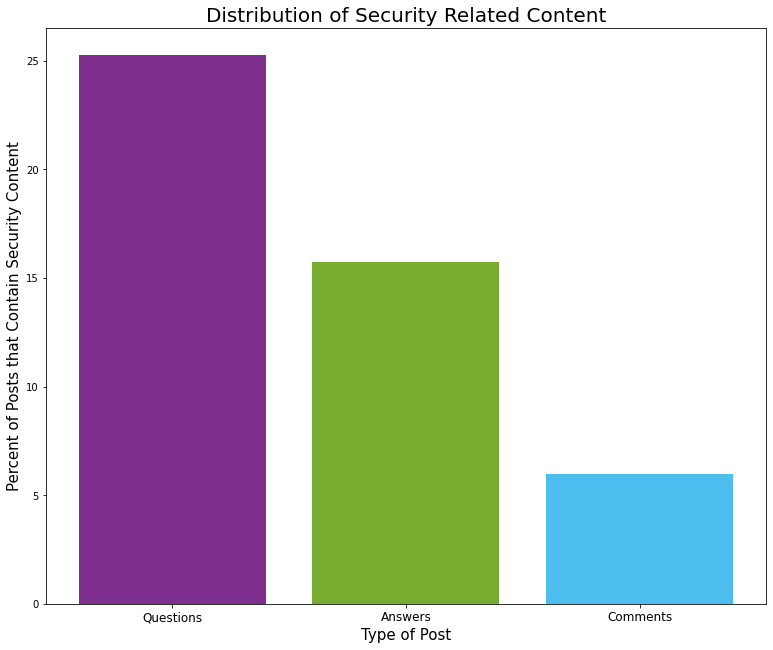

In [ ]:
fig = plt.figure(figsize =(10,8))
content_types = ['Questions', 'Answers', 'Comments']
ax = fig.add_axes([0,0,1,1])
percents = [q_percent["percent"][0], a_percent["percent"][0], c_percent["percent"][0]]
plt.bar(content_types, percents, color = ["#7E2F8E","#77AC30", "#4DBEEE" ])
plt.title("Distribution of Security Related Content", fontsize=20)
plt.xlabel("Type of Post", fontsize=15)
plt.ylabel("Percent of Posts that Contain Security Content", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks()
plt.show()

Here we see that in our sample of 10% of each table, around 25% of questions contain security related topics, around 17% of answers contain security related topics and only about 7% of all comments contain security related topics. 

## Location of security-related content in a thread
Is security-related content in the question, answer, or both? 

A thread is the question, answer, comments, and everything associated with them on one page. 

We are taking two samples of the tables due to the computation limit. This means that we might miss answers associated with posts and vice versa since within a question-answer pair, only one may be included in the sample. We still believe this is an accurate way to answer the question because we are only looking at the instances where there is question and matching answer(s) in both of the sample datasets. 

In [ ]:
 %%bigquery loc --project $project_id

WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)

SELECT COUNTIF((REGEXP_CONTAINS((answers.body), terms.regex_str) = false AND REGEXP_CONTAINS((answers.title), terms.regex_str) = false) AND (REGEXP_CONTAINS((posts.body), terms.regex_str) = true OR REGEXP_CONTAINS((posts.title), terms.regex_str) = true))as only_question, COUNTIF((REGEXP_CONTAINS((answers.body), terms.regex_str) = true OR REGEXP_CONTAINS((answers.title), terms.regex_str) = true) AND (REGEXP_CONTAINS((posts.body), terms.regex_str) = false AND REGEXP_CONTAINS((posts.title), terms.regex_str) = false))as only_answer, 
COUNTIF((REGEXP_CONTAINS((answers.body), terms.regex_str) = true OR REGEXP_CONTAINS((answers.title), terms.regex_str) = true) AND (REGEXP_CONTAINS((posts.body), terms.regex_str) = true OR REGEXP_CONTAINS((posts.title), terms.regex_str) = true))as both, 

FROM (SELECT * FROM `bigquery-public-data.stackoverflow.posts_answers` TABLESAMPLE SYSTEM (10 PERCENT)) AS answers, (SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE SYSTEM (10 PERCENT)) AS posts, terms
WHERE posts.id = answers.parent_id 



Could not save output to variable 'loc'.

ERROR:
 ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7f0ee613fd90>)


In [ ]:
fig = plt.figure(figsize =(10,8))
content_types = ['Questions', 'Answers', 'Comments']
ax = fig.add_axes([0,0,1,1])
values = [loc["only_question"][0], loc["only_answer"][0], loc["both"][0]]
location = ['Only Question', 'Only Answer', 'Both Question and Answer']
plt.bar(location, values, color = ["#7E2F8E","#77AC30", "#008080" ])
plt.title("Distribution of Security Related Content", fontsize=20)
plt.xlabel("Type of Post", fontsize=15)
plt.ylabel("Percent of Posts that Contain Security Content", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks()
plt.show()

NameError: ignored

### Analysis 
We find that there are no questions with security related content that do not have answers that also have security related content. This makes intuitive sense because questions that bring up security-related questions will almost always also include security-related topics in the answers since both often have the same language. The interesting insight here is that most of the security-related content on threads comes from someone bringing it up in an answer. This means that people are discussing security even when it is not the immediate question. This is exciting news because it shows an awareness of security among people who are answering questions. 


## Tags Associated with Security


In [ ]:
%%bigquery qthree --project $project_id 

WITH terms AS ( SELECT
'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\'' as regex_str)

SELECT SUM(w.num_matches) as num_matches, tags
FROM (
  SELECT  body, ARRAY_LENGTH(REGEXP_EXTRACT_ALL(posts.body, terms.regex_str)) as num_matches, posts.tags
  FROM (SELECT * FROM `bigquery-public-data.stackoverflow.stackoverflow_posts` TABLESAMPLE SYSTEM (30 PERCENT)) AS posts, terms
  WHERE REGEXP_EXTRACT_ALL(posts.body, terms.regex_str) is not NULL and LENGTH(posts.tags) > 1
  ) w
GROUP BY w.tags
ORDER BY num_matches DESC
LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

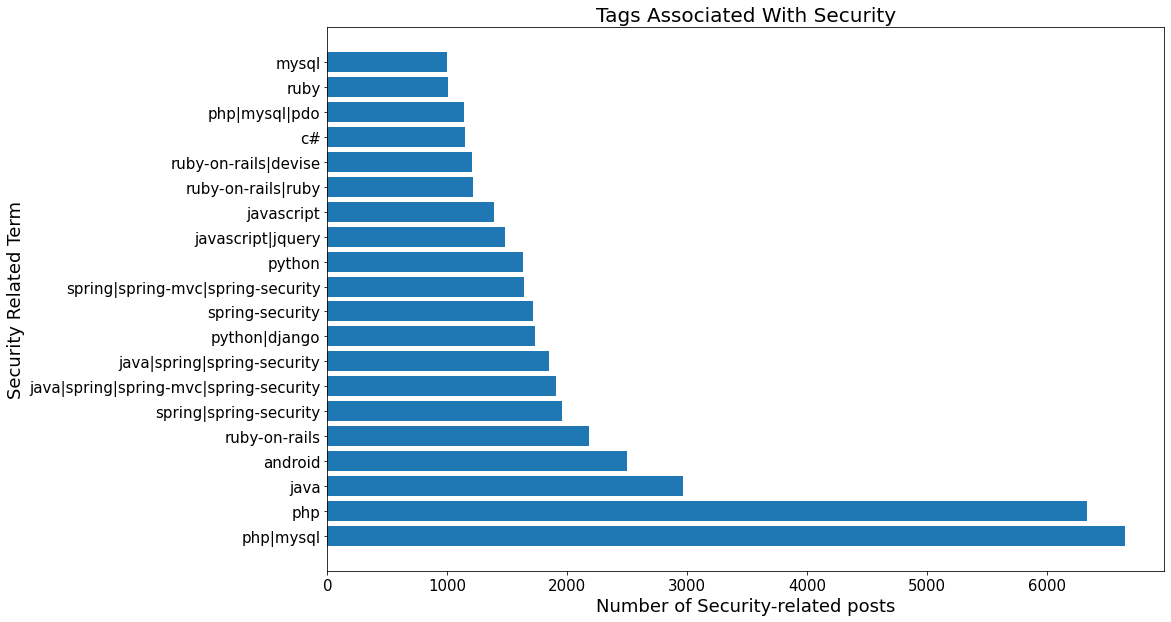

In [ ]:
plt.figure(figsize = (15, 10))
plt.barh(qthree["tags"], qthree["num_matches"])
plt.title("Tags Associated With Security", fontsize=20)
plt.ylabel("Security Related Term", fontsize=18)
plt.xlabel("Number of Security-related posts", fontsize=18)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Analysis 
This is super interesting because it shows the subjects that bring up most of the security-related content. It is not suprising that php|sql, java and android have the most the security-related content because they are very popular and thus are more susceptibles to security threats. Additionally, a lot of security related issue invlove data and since SQL is one of the main coding languages associated with data management, the correlation here is not surprising. 

## Security Focused Users

### Percent of security-focused users 
What percent of users with about-me sections used the word "security" in their bio?

In [ ]:
## run the query 
%%bigquery --project $project_id

SELECT (COUNTIF(about_me LIKE "%security%")/ COUNT(*)) * 100 as percent
FROM (SELECT * FROM `bigquery-public-data.stackoverflow.users` 
WHERE about_me is not NULL)


Query is running:   0%|          |

Downloading:   0%|          |

,percent
0,0.559767


### Reputation of Security-focused users
What is the average reputation of a security-focused user versus average reputation of a non-security-focused user? 

In [ ]:
%%bigquery --project $project_id
SELECT AVG(reputation), 1 as contains_security FROM `bigquery-public-data.stackoverflow.users` WHERE about_me is not NULL and about_me LIKE "%security%" 
union all
SELECT AVG(reputation), 0 as contains_security FROM `bigquery-public-data.stackoverflow.users` WHERE about_me is not NULL

Query is running:   0%|          |

Downloading:   0%|          |

,f0_,contains_security
0,885.716211,1
1,444.840131,0


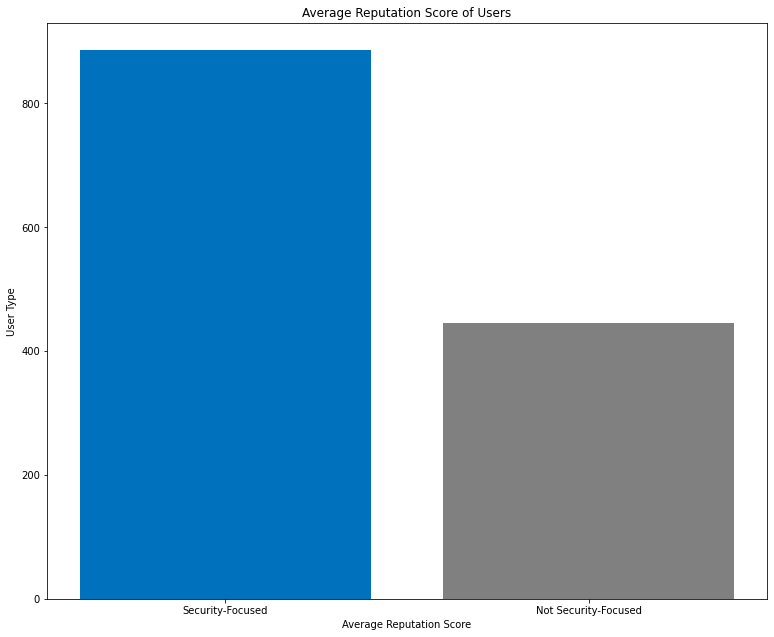

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
usertype = ['Security-Focused', 'Not Security-Focused']
reputation = [885.716211, 444.840131]
ax.bar(usertype,reputation, color = ["#0072BD", "#808080"])
ax.set_ylabel('User Type')
ax.set_xlabel('Average Reputation Score')
ax.set_title('Average Reputation Score of Users')
plt.show()

### Geographic Distribution
Where are security focused users located in the world?

In [ ]:
%%bigquery --project $project_id
SELECT location, COUNT(*) as count FROM `bigquery-public-data.stackoverflow.users` WHERE about_me is not NULL and about_me LIKE "%security%" and location is not NULL
GROUP BY location
ORDER BY count DESC
LIMIT 200

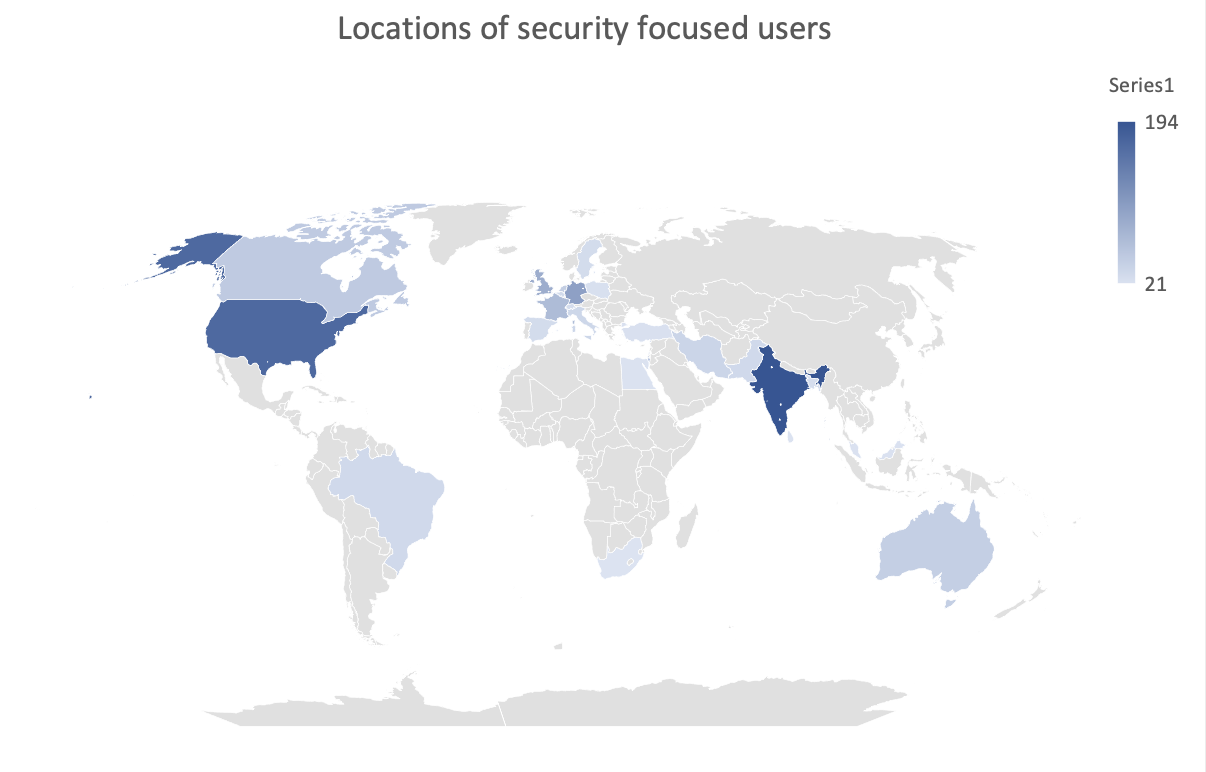

###Security-focused users and their questions
What percent of security-related questions are asked by security-focused users? 

In [ ]:
%%bigquery --project $project_id
WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl| mitm |spectr|indirect branch|meltdown|rogu inflight data load| rldi |zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood| dos |udp amplifi| mirai |malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri| ssrf |miss authent|miss author|improp authent| tsl \'' as regex_str)

SELECT (COUNTIF(users.about_me LIKE "%security%")/ COUNT(*)) * 100 as percent
FROM (SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE SYSTEM (30 PERCENT)) AS posts, `bigquery-public-data.stackoverflow.users` as users, terms
WHERE REGEXP_CONTAINS(LOWER(posts.body), terms.regex_str) and users.about_me is not NULL 

### Analysis
This exploration shows that there is some presence of security of stack overflow's platform. The percentage of security-focused users is very low, but their reputation twice as high as the non-security focused counterpart. This shows that security-focused users tend to be more experienced. Interestingly, they don't ask a lot of the security-focused questions, and likely answer with more security-related content than ask it. Unfortunately, all of the answers have their user id's nulled so we cannot map answers to the user. 

##Popularity of Security Content

### Average score of security-related questions 

What is the average score of security-related questions compared to average score of non-security-related questions?



In [ ]:
%%bigquery q_score --project $project_id

WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)


SELECT AVG(score) as score, 1 as contains_security FROM`bigquery-public-data.stackoverflow.posts_questions` AS posts, terms 
WHERE REGEXP_CONTAINS((posts.body), terms.regex_str) = true 

union all 

SELECT AVG(score) as score, 0 as contains_security FROM `bigquery-public-data.stackoverflow.posts_questions` AS posts, terms 
WHERE REGEXP_CONTAINS((posts.body), terms.regex_str) = false




Query is running:   0%|          |

Downloading:   0%|          |

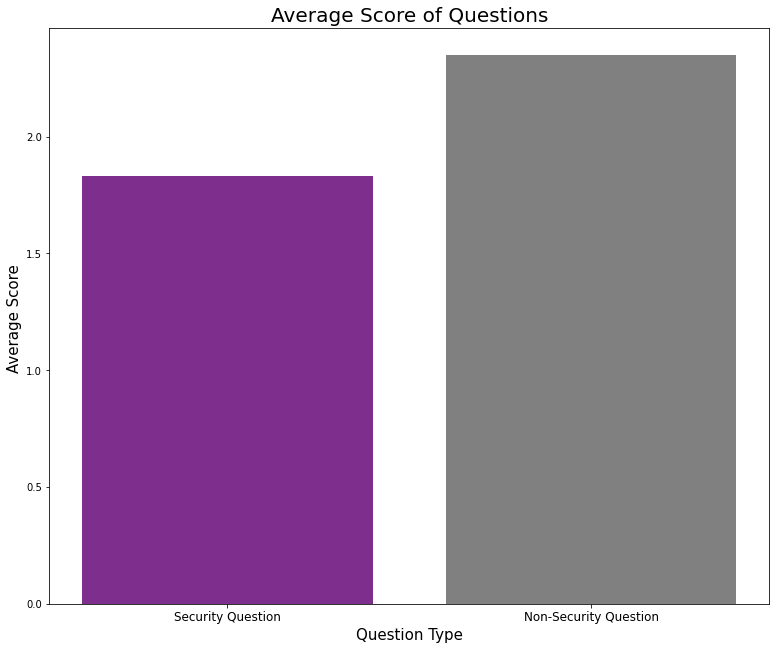

In [ ]:
fig = plt.figure(figsize =(10,8))
content_types = ['Security Question', 'Non-Security Question']
ax = fig.add_axes([0,0,1,1])
percents = q_score["score"]
plt.bar(content_types, percents, color = ["#7E2F8E", "#808080" ])
plt.title("Average Score of Questions", fontsize=20)
plt.xlabel("Question Type", fontsize=15)
plt.ylabel("Average Score ", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks()
plt.show()

### Average score of security-related answers 

What is the average score of security-related answers compared to average score of non-security-related answers?

In [ ]:
%%bigquery a_score --project $project_id

WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)


SELECT AVG(score) as score, 1 as contains_security FROM`bigquery-public-data.stackoverflow.posts_answers` AS answers, terms 
WHERE REGEXP_CONTAINS((answers.body), terms.regex_str) = true 

union all 

SELECT AVG(score) as score, 0 as contains_security FROM `bigquery-public-data.stackoverflow.posts_answers` AS answers, terms 
WHERE REGEXP_CONTAINS((answers.body), terms.regex_str) = false




Query is running:   0%|          |

Downloading:   0%|          |

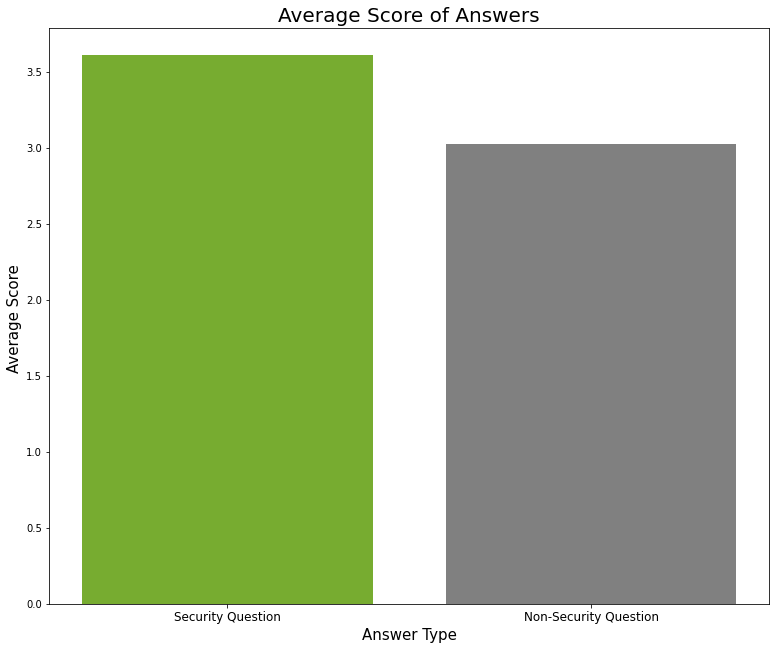

In [ ]:
fig = plt.figure(figsize =(10,8))
content_types = ['Security Answer', 'Non-Security Answer']
ax = fig.add_axes([0,0,1,1])
percents = a_score["score"]
plt.bar(content_types, percents, color = ["#77AC30", "#808080" ])
plt.title("Average Score of Answers", fontsize=20)
plt.xlabel("Answer Type", fontsize=15)
plt.ylabel("Average Score ", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks()
plt.show()

### Average score of security-related comments 

What is the average score of security-related comments compared to average score of non-security-related comments? 

In [ ]:
%%bigquery c_score --project $project_id
WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)


SELECT AVG(score) as score, 1 as contains_security FROM`bigquery-public-data.stackoverflow.comments` AS comments, terms 
WHERE REGEXP_CONTAINS((comments.text), terms.regex_str) = true 

union all 

SELECT AVG(score) as score, 0 as contains_security FROM `bigquery-public-data.stackoverflow.comments` AS comments, terms 
WHERE REGEXP_CONTAINS((comments.text), terms.regex_str) = false

Query is running:   0%|          |

Downloading:   0%|          |

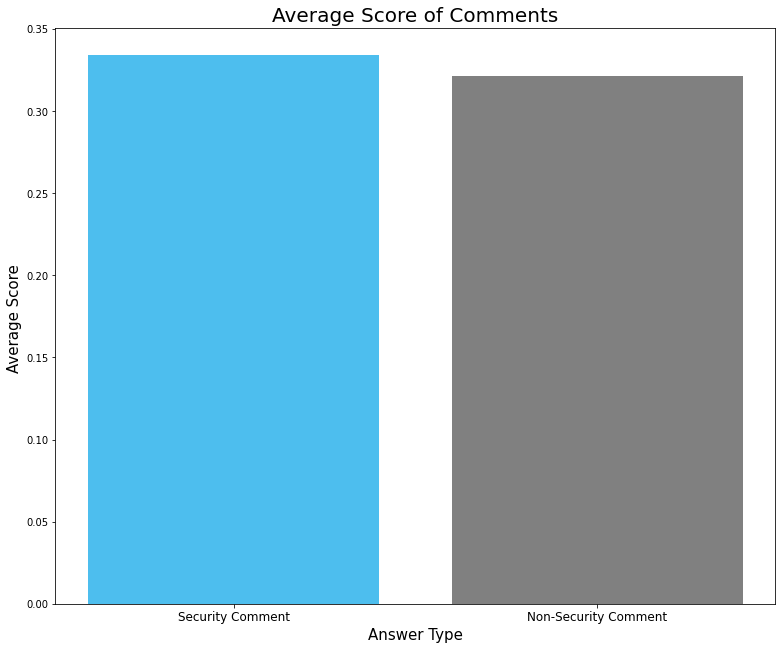

In [ ]:

fig = plt.figure(figsize =(10,8))
content_types = ['Security Comment', 'Non-Security Comment']
ax = fig.add_axes([0,0,1,1])
percents = c_score["score"]
plt.bar(content_types, percents, color = ["#4DBEEE", "#808080" ])
plt.title("Average Score of Comments", fontsize=20)
plt.xlabel("Answer Type", fontsize=15)
plt.ylabel("Average Score ", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks()
plt.show()

### Analysis
Here, we use scores to measure how well the post type is received on stack overflow, signifying its popularity. Interestingly, security containing answers and comments are more popular than non-security content. However, for questions, the opposite is true. Questions without security content are  more popular than non-security questions. This might be because other topics are more relevant to the average developer. Additionally, the difference in popularity in comments may be marginal since comments tend to have low scores (both averageing less than 1) since not many people read through all comments.  

## View Count of Security Topics

How many security related posts are reaching large audiences? How is the view count of questions impacted by security presence?

In [ ]:

%%bigquery q_view --project $project_id
WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)


SELECT AVG(view_count) as view, 1 as contains_security FROM`bigquery-public-data.stackoverflow.posts_questions` AS posts, terms 
WHERE REGEXP_CONTAINS((posts.body), terms.regex_str) = true 

union all 

SELECT AVG(view_count) as view, 0 as contains_security FROM `bigquery-public-data.stackoverflow.posts_questions` AS posts, terms 
WHERE REGEXP_CONTAINS((posts.body), terms.regex_str) = false


Query is running:   0%|          |

Downloading:   0%|          |

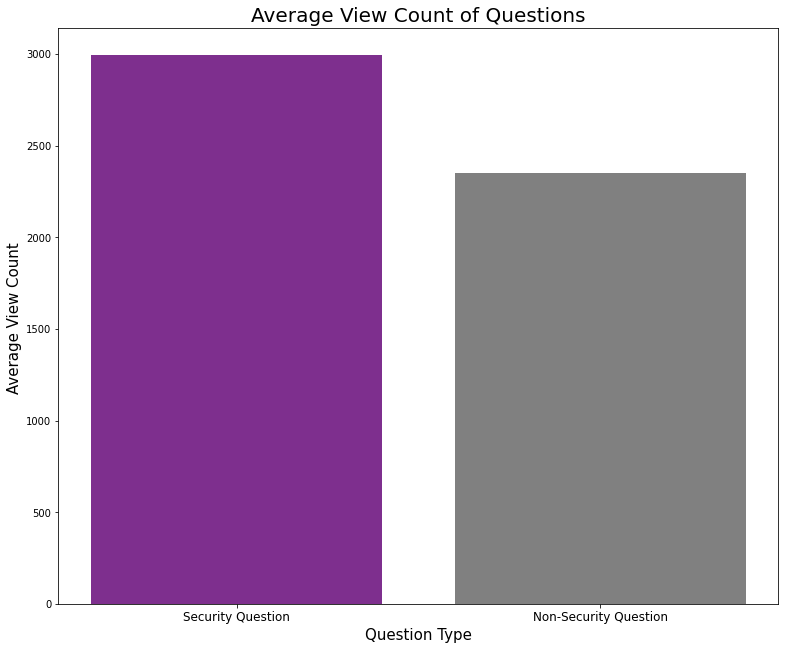

In [ ]:
fig = plt.figure(figsize =(10,8))
content_types = ['Security Question', 'Non-Security Question']
ax = fig.add_axes([0,0,1,1])
percents = q_view["view"]
plt.bar(content_types, percents, color = ["#7E2F8E", "#808080" ])
plt.title("Average View Count of Questions", fontsize=20)
plt.xlabel("Question Type", fontsize=15)
plt.ylabel("Average View Count ", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks()
plt.show()

### Analysis

Here, we see that on average security questions have a higher watch count than non-security questions. This indicates that more people are viewing and seeing questions about security topics perhaps they too have similar questions or curious about the topic. 

## Top Security Topics

### Top ranked topics in post questions

In [ ]:
%%bigquery post_questions_high_freq --project $project_id 

WITH terms AS ( SELECT 'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\'' as regex_str)

SELECT COUNT(*) as num_matches, matches
FROM (
  SELECT REGEXP_EXTRACT_ALL(post_q.body, terms.regex_str) as matches

  FROM (SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE  SYSTEM (10 PERCENT)) AS post_q, terms
  WHERE REGEXP_EXTRACT_ALL(post_q.body, terms.regex_str) is not NULL
  ) w, UNNEST(matches) AS matches
GROUP BY matches
ORDER BY num_matches DESC
LIMIT 20 

Query is running:   0%|          |

Downloading:   0%|          |

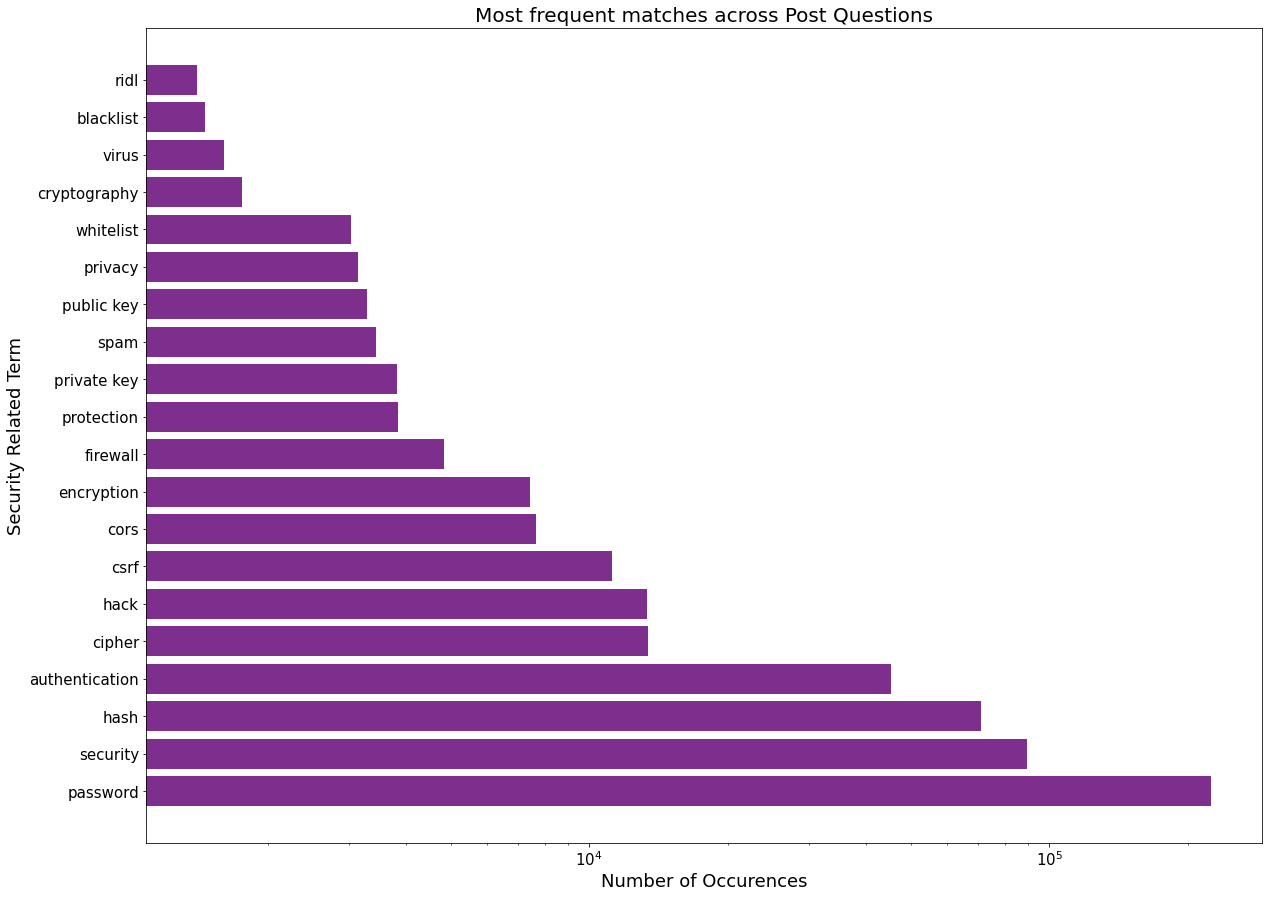

In [ ]:
plt.figure(figsize = (20, 15))
plt.barh(post_questions_high_freq["matches"], post_questions_high_freq["num_matches"], color = "#7E2F8E")
plt.title("Most frequent matches across Post Questions", fontsize=20)
plt.xlabel("Number of Occurences", fontsize=18)
plt.ylabel("Security Related Term", fontsize=18)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.xscale("log")
plt.show()

### Top ranked topics in post answers

In [ ]:
%%bigquery post_answers_high_freq --project $project_id

WITH terms AS ( SELECT 'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\'' as regex_str)


SELECT COUNT(*) as num_matches, matches
FROM (
  SELECT REGEXP_EXTRACT_ALL(post_a.body, terms.regex_str) as matches

  FROM
   (SELECT * FROM `bigquery-public-data.stackoverflow.posts_answers` TABLESAMPLE  SYSTEM (10 PERCENT)) AS post_a, terms
  WHERE REGEXP_EXTRACT_ALL(post_a.body, terms.regex_str) is not NULL
  ) w, UNNEST(matches) AS matches
GROUP BY matches
ORDER BY num_matches DESC
LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

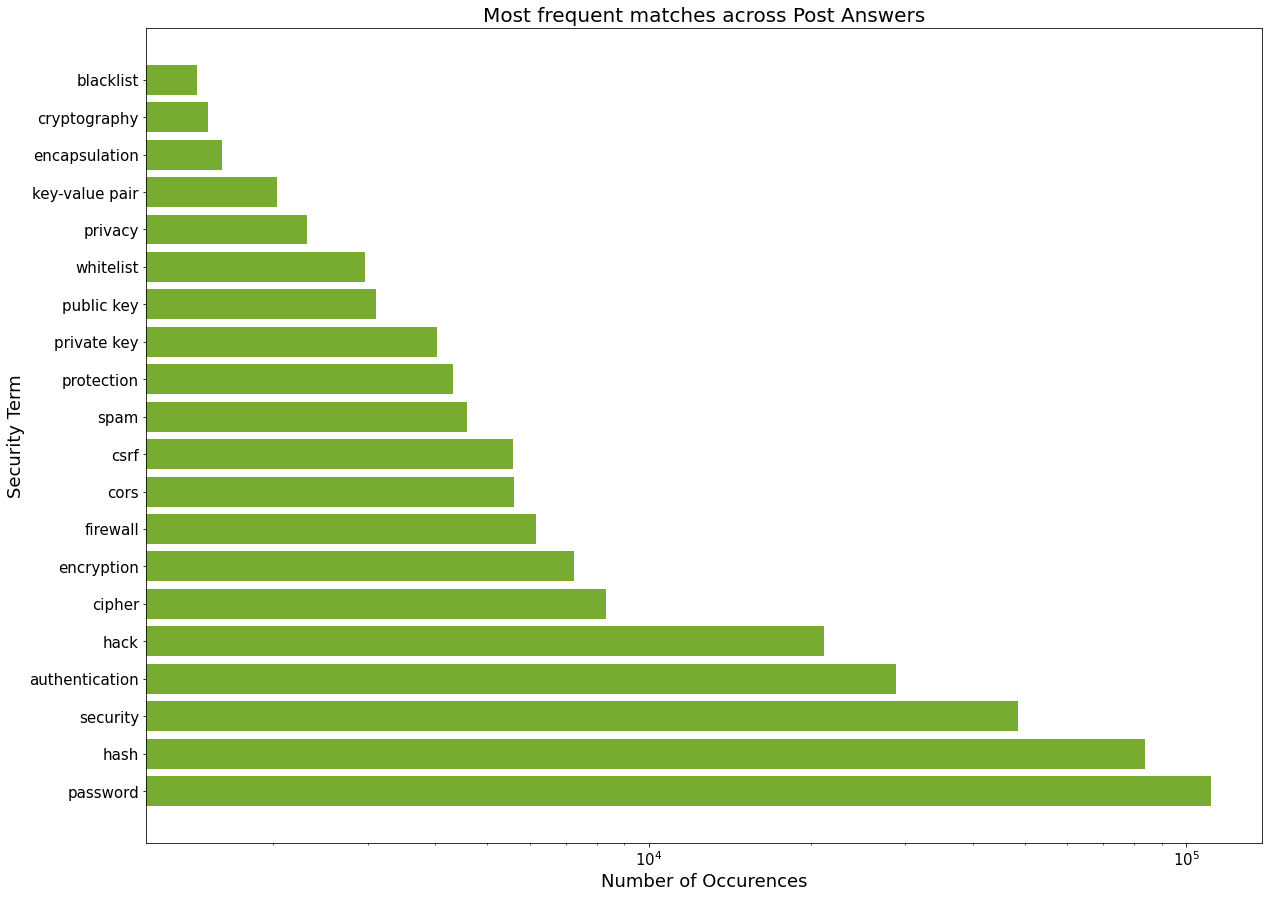

In [ ]:
plt.figure(figsize = (20, 15))
#figsize = (20, 15)
plt.barh(post_answers_high_freq["matches"], post_answers_high_freq["num_matches"], color = "#77AC30")
plt.title("Most frequent matches across Post Answers", fontsize=20)
plt.xlabel("Number of Occurences", fontsize=18)
plt.ylabel("Security Term", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale("log")
plt.show()

### Top ranked topics in comments

In [ ]:
%%bigquery comments_high_freq --project $project_id

WITH terms AS ( SELECT 'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\'' as regex_str)


SELECT COUNT(*) as num_matches, matches
FROM (
  SELECT REGEXP_EXTRACT_ALL(comments.text, terms.regex_str) as matches
  FROM (SELECT * FROM `bigquery-public-data.stackoverflow.comments` TABLESAMPLE  SYSTEM (20 PERCENT)) AS comments, terms
  WHERE REGEXP_EXTRACT_ALL(comments.text, terms.regex_str) is not NULL
  ) w, UNNEST(matches) AS matches
GROUP BY matches
ORDER BY num_matches DESC
LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

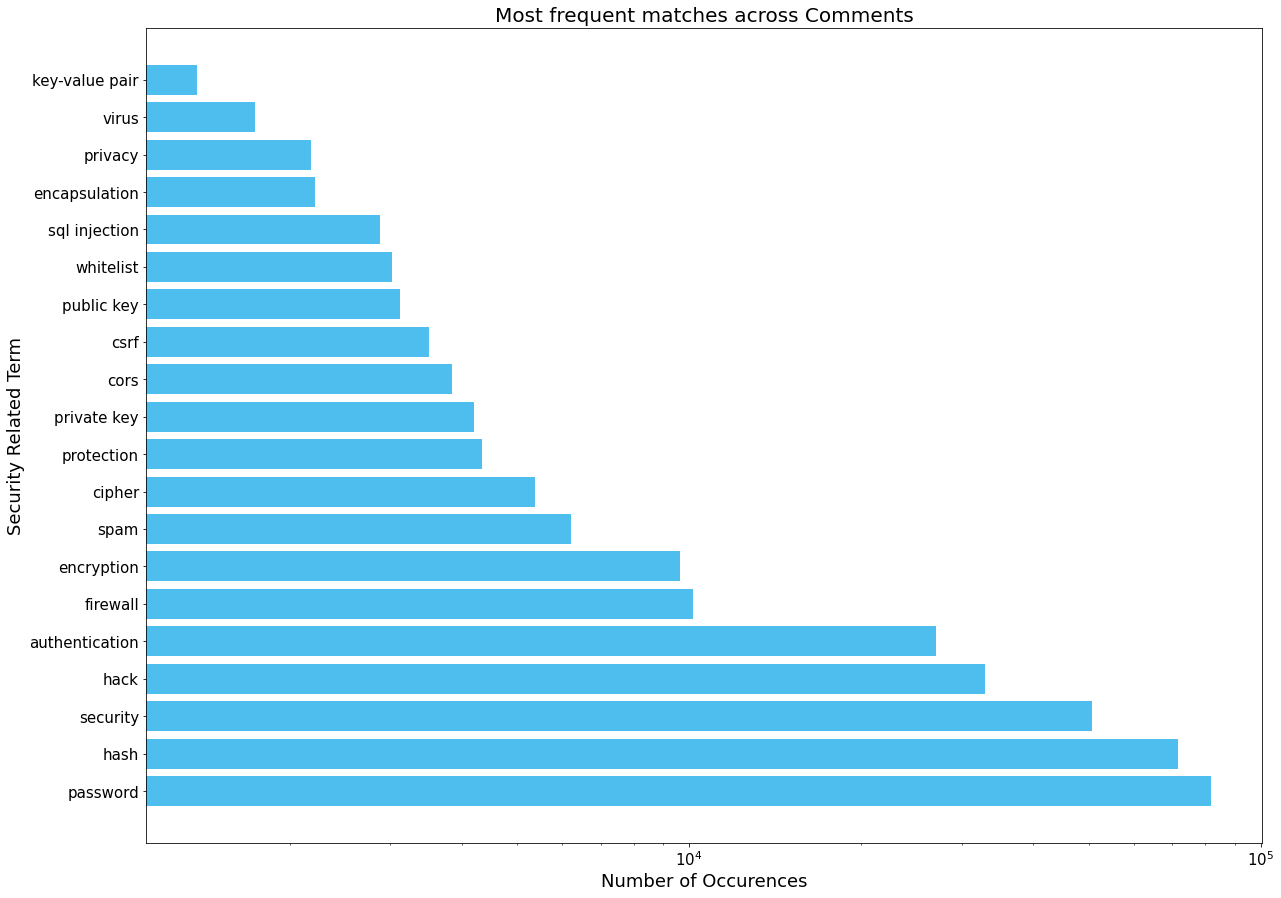

In [ ]:
plt.figure(figsize = (20, 15))
plt.barh(comments_high_freq["matches"], comments_high_freq["num_matches"], color = "#4DBEEE")
plt.title("Most frequent matches across Comments", fontsize=20)
plt.xlabel("Number of Occurences", fontsize=18)
plt.ylabel("Security Related Term", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale("log")
plt.show()

### Analysis

Not surprisingly, common words like password, hash, encryption fall among the top most common security topics across questions, answers and comments. 

## Least Popular Security Topics

### Low ranked topics in post questions

In [ ]:
%%bigquery post_questions_low_freq --project $project_id 

WITH terms AS ( SELECT 'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\'' as regex_str)

SELECT COUNT(*) as num_matches, matches
FROM (
  SELECT REGEXP_EXTRACT_ALL(post_q.body, terms.regex_str) as matches

  FROM (SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE  SYSTEM (10 PERCENT)) AS post_q, terms
  WHERE REGEXP_EXTRACT_ALL(post_q.body, terms.regex_str) is not NULL
  ) w, UNNEST(matches) AS matches
GROUP BY matches
ORDER BY num_matches ASC
LIMIT 20 

Query is running:   0%|          |

Downloading:   0%|          |

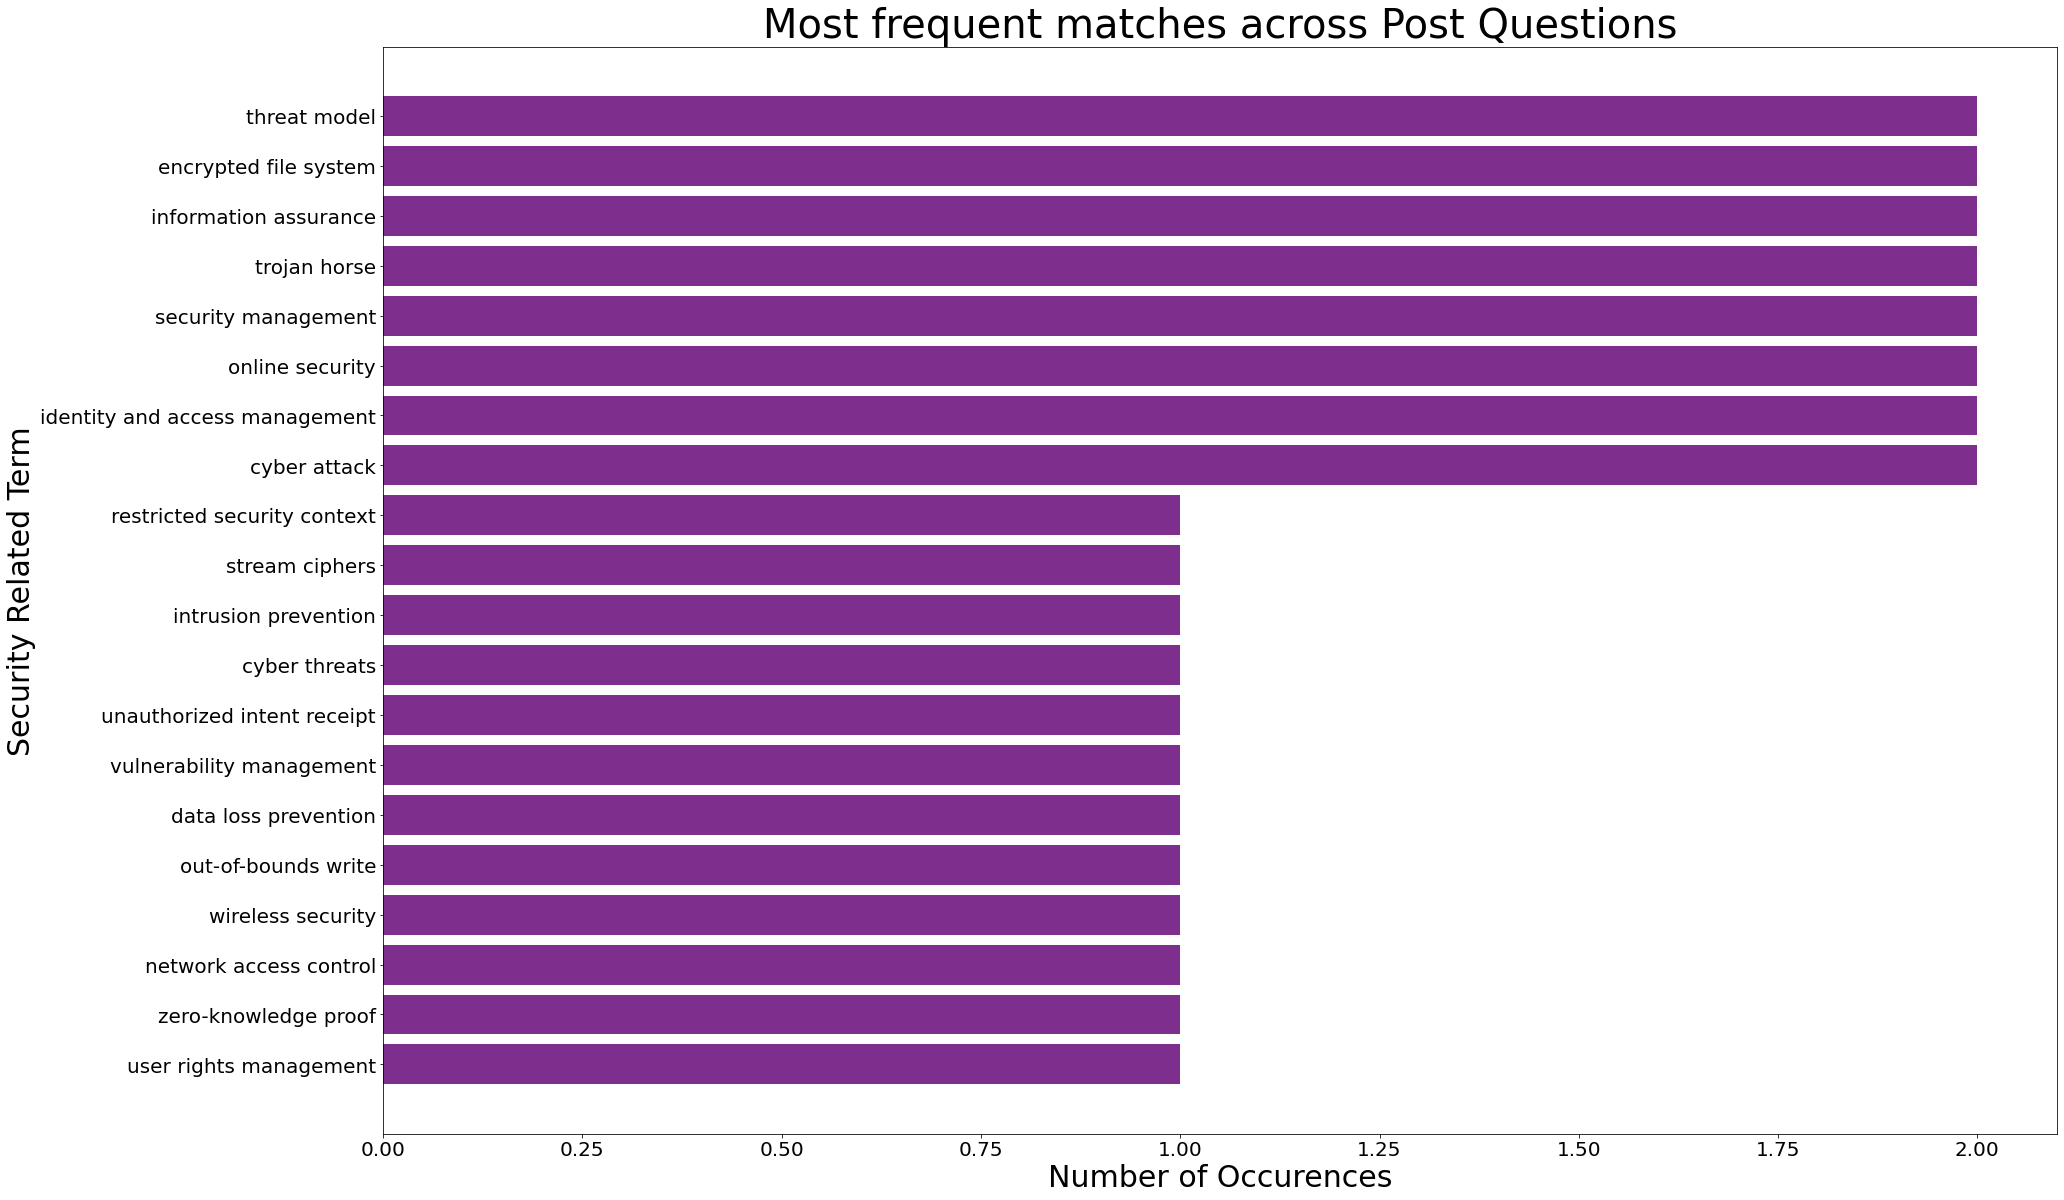

In [ ]:
plt.figure(figsize = (30, 20))
plt.barh(post_questions_low_freq["matches"], post_questions_low_freq["num_matches"], color = "#7E2F8E")
plt.title("Most frequent matches across Post Questions", fontsize=40)
plt.xlabel("Number of Occurences", fontsize=30)
plt.ylabel("Security Related Term", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Low ranked topics in post answers

In [ ]:
%%bigquery post_answers_low_freq --project $project_id

WITH terms AS ( SELECT 'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\'' as regex_str)


SELECT COUNT(*) as num_matches, matches
FROM (
  SELECT REGEXP_EXTRACT_ALL(post_a.body, terms.regex_str) as matches

  FROM
   (SELECT * FROM `bigquery-public-data.stackoverflow.posts_answers` TABLESAMPLE  SYSTEM (10 PERCENT)) AS post_a, terms
  WHERE REGEXP_EXTRACT_ALL(post_a.body, terms.regex_str) is not NULL
  ) w, UNNEST(matches) AS matches
GROUP BY matches
ORDER BY num_matches ASC
LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

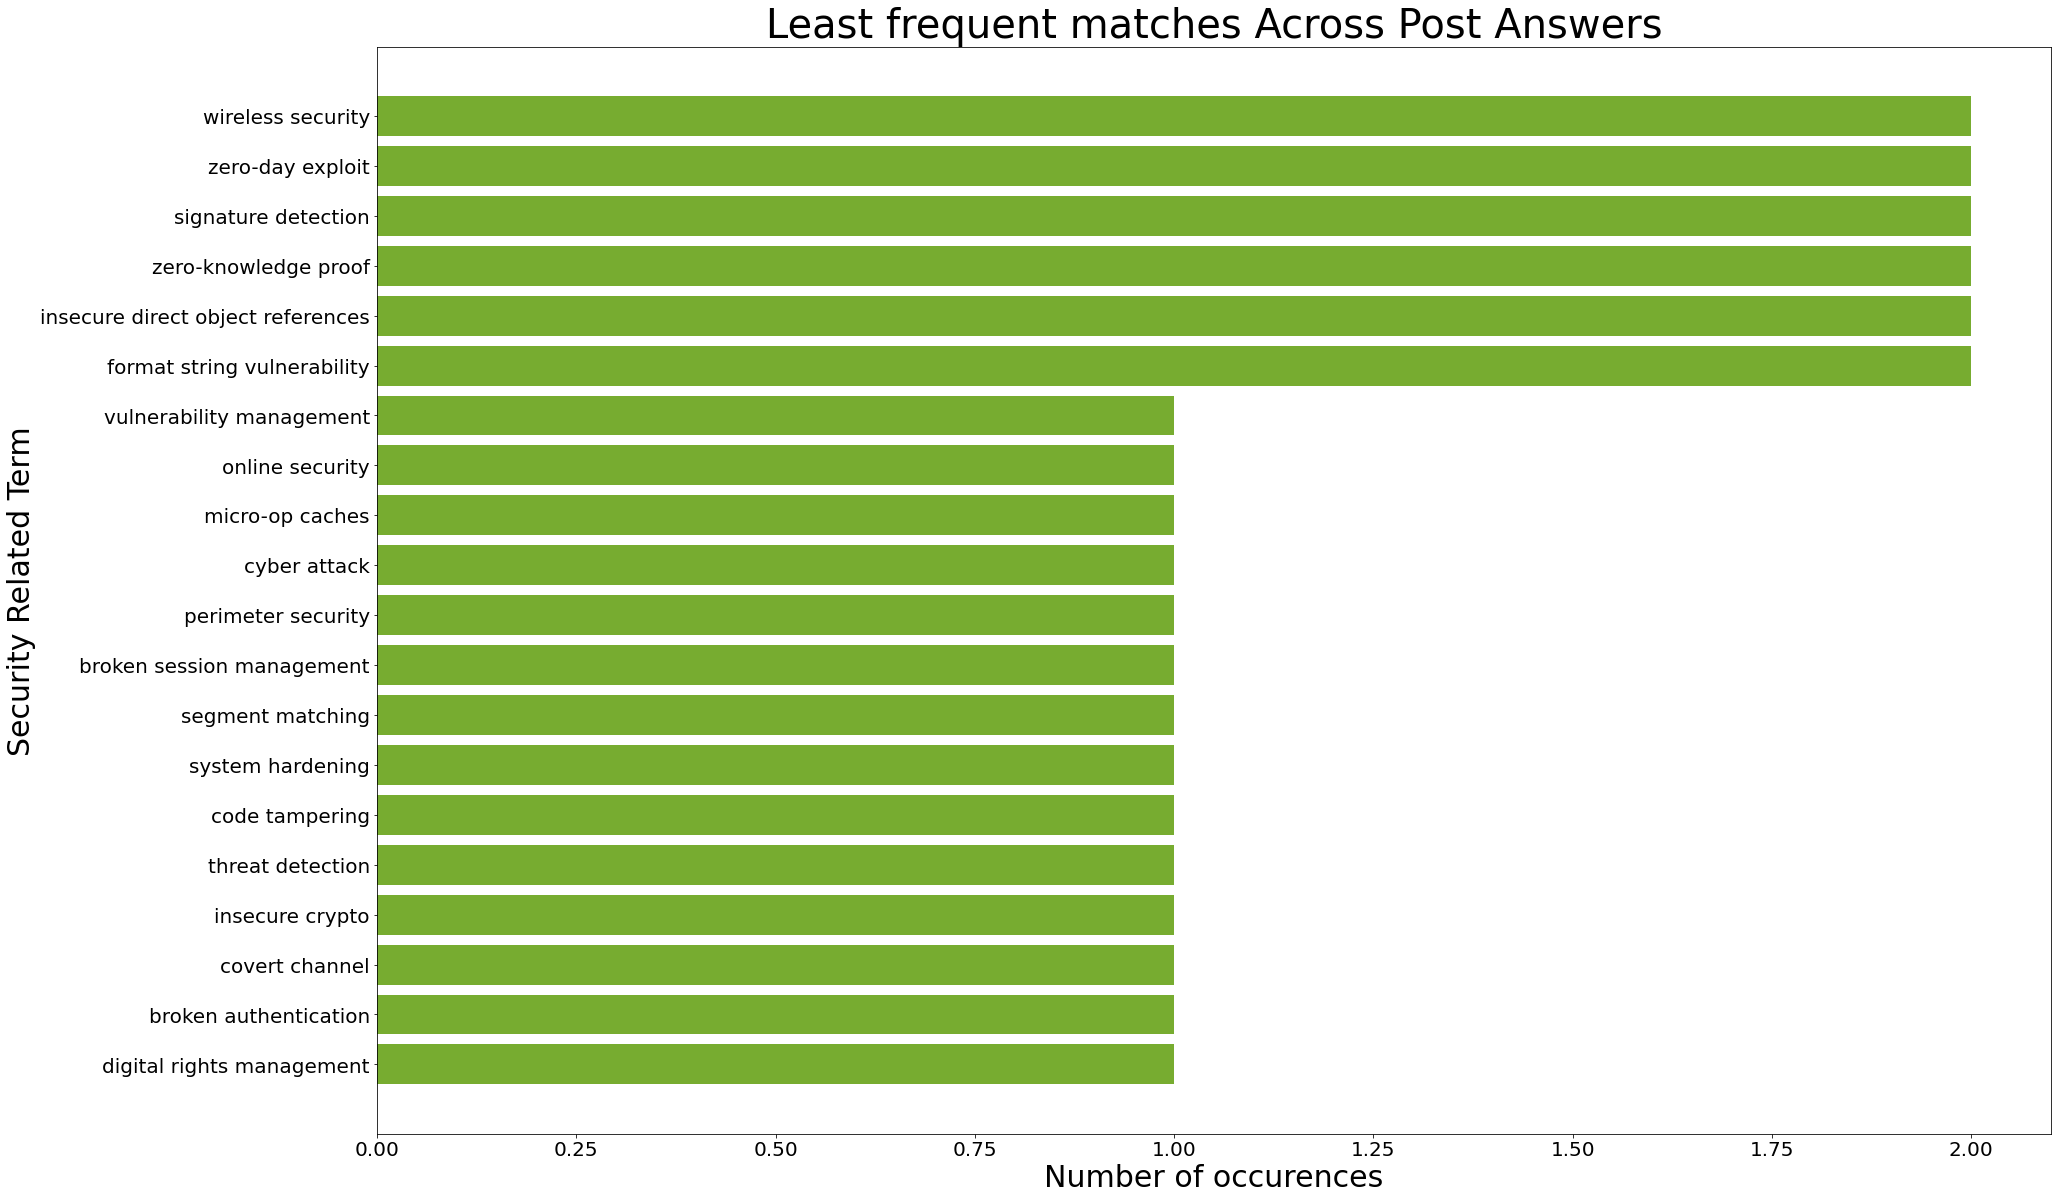

In [ ]:
plt.figure(figsize = (30, 20))
plt.barh(post_answers_low_freq["matches"], post_answers_low_freq["num_matches"], color = "#77AC30")
plt.title("Least frequent matches Across Post Answers", fontsize=40)
plt.xlabel("Number of occurences", fontsize=30)
plt.ylabel("Security Related Term", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Low ranked topics in post comments

In [ ]:
%%bigquery comments_low_freq --project $project_id

WITH terms AS ( SELECT 'r\'control hijacking|buffer overflow|integer overflow|format string vulnerability|use after free|nop slide|heap spraying|shellcode|fuzzing|double free|arbitrary memory|return oriented programming|canary extraction|extract aslr|control flow integrity|privilege separation|access control|process isolation|restricted security context|confinement|chroot|jail|hypervisor|covert channel|software fault isolation|segment matching|cross domain calls|static analysis|dynamic analyisis|fuzzing|same origin policy|cross-origin resource sharing|cross-site request forgery|cors|csrf|sql injection|cross site scripting|cookie theft|content security policy|clickjacking|third-party content safety|sub-resource integrity|phishing|security keys|transport layer security|stream ciphers|wrong issuance|man in the middle|mitm|spectre|indirect branches|meltdown|rogue inflight data load|ridl|fallout|zombieload|store-to-leak forwarding|micro-op caches|hijack|dns spoofing|spoof|dns rebinding|denial of service|dos flood|amplification|udp amplifier|mirai|malware|password guessing|intrusion detection|signature detection|anomaly detection|privacy|censorship|decoy routing|threat model|password hashing|encryption|eavesdropping|unauthorized intent receipt|intent spoofing|security alerts|reverse engineering|code tampering|broken authentication|broken session management|insecure direct object references|security misconfiguration|insecure crypto|out-of-bounds write|code injection|server-side request forgery|ssrf|missing authentication|missing authorization|improper authentication|access control|antivirus|authentication|blacklist|breach|cipher|encryption|firewall|hash|intrusion detection|intrusion prevention|malware|password|phishing|public key|private key|risk assessment|security policy|spam|spyware|virus|whitelist|two-factor authentication|encapsulation|access point|asymmetric encryption|biometric authentication|cryptography|cyber attack|cybersecurity|data backup|data protection|digital certificate|digital signature|disaster recovery|end-to-end encryption|firewall rules|honeypot|identity and access management|information security|key management|malicious code|network security|online security|patch management|penetration testing|perimeter security|physical security|public key infrastructure|risk management|security information and event management|security operations center|security protocols|security tokens|system security|threat intelligence|threat modeling|trojan horse|virtual private network|vulnerability assessment|web security|wireless security|zero-day exploit|certificate authority|cloud security|cyber insurance|data loss prevention|digital rights management|encapsulation security|encrypted file system|endpoint security|federated identity|identity federation|identity management|information assurance|information security management system|key-value pair|network access control|public key cryptography|security architecture|security engineering|security governance|security information management|security incident|security management|social engineering|strong password|system hardening|threat detection|two-step verification|user authentication|user rights management|virtualization security|vulnerability management|web application security|white hat hacker|worm|zero-knowledge proof|security|security risks|protection|information security|cyber threats|online security|global cybersecurity|digital security|personal cybersecurity|webcontent security|windows 10 : added new features to help keep your data secure|data privacy|firewalls|anti-virus software|intrusion prevention system|hack|data theft|malware analysis and removal software\'' as regex_str)


SELECT COUNT(*) as num_matches, matches
FROM (
  SELECT REGEXP_EXTRACT_ALL(comments.text, terms.regex_str) as matches
  FROM (SELECT * FROM `bigquery-public-data.stackoverflow.comments` TABLESAMPLE  SYSTEM (20 PERCENT)) AS comments, terms
  WHERE REGEXP_EXTRACT_ALL(comments.text, terms.regex_str) is not NULL
  ) w, UNNEST(matches) AS matches
GROUP BY matches
ORDER BY num_matches ASC
LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

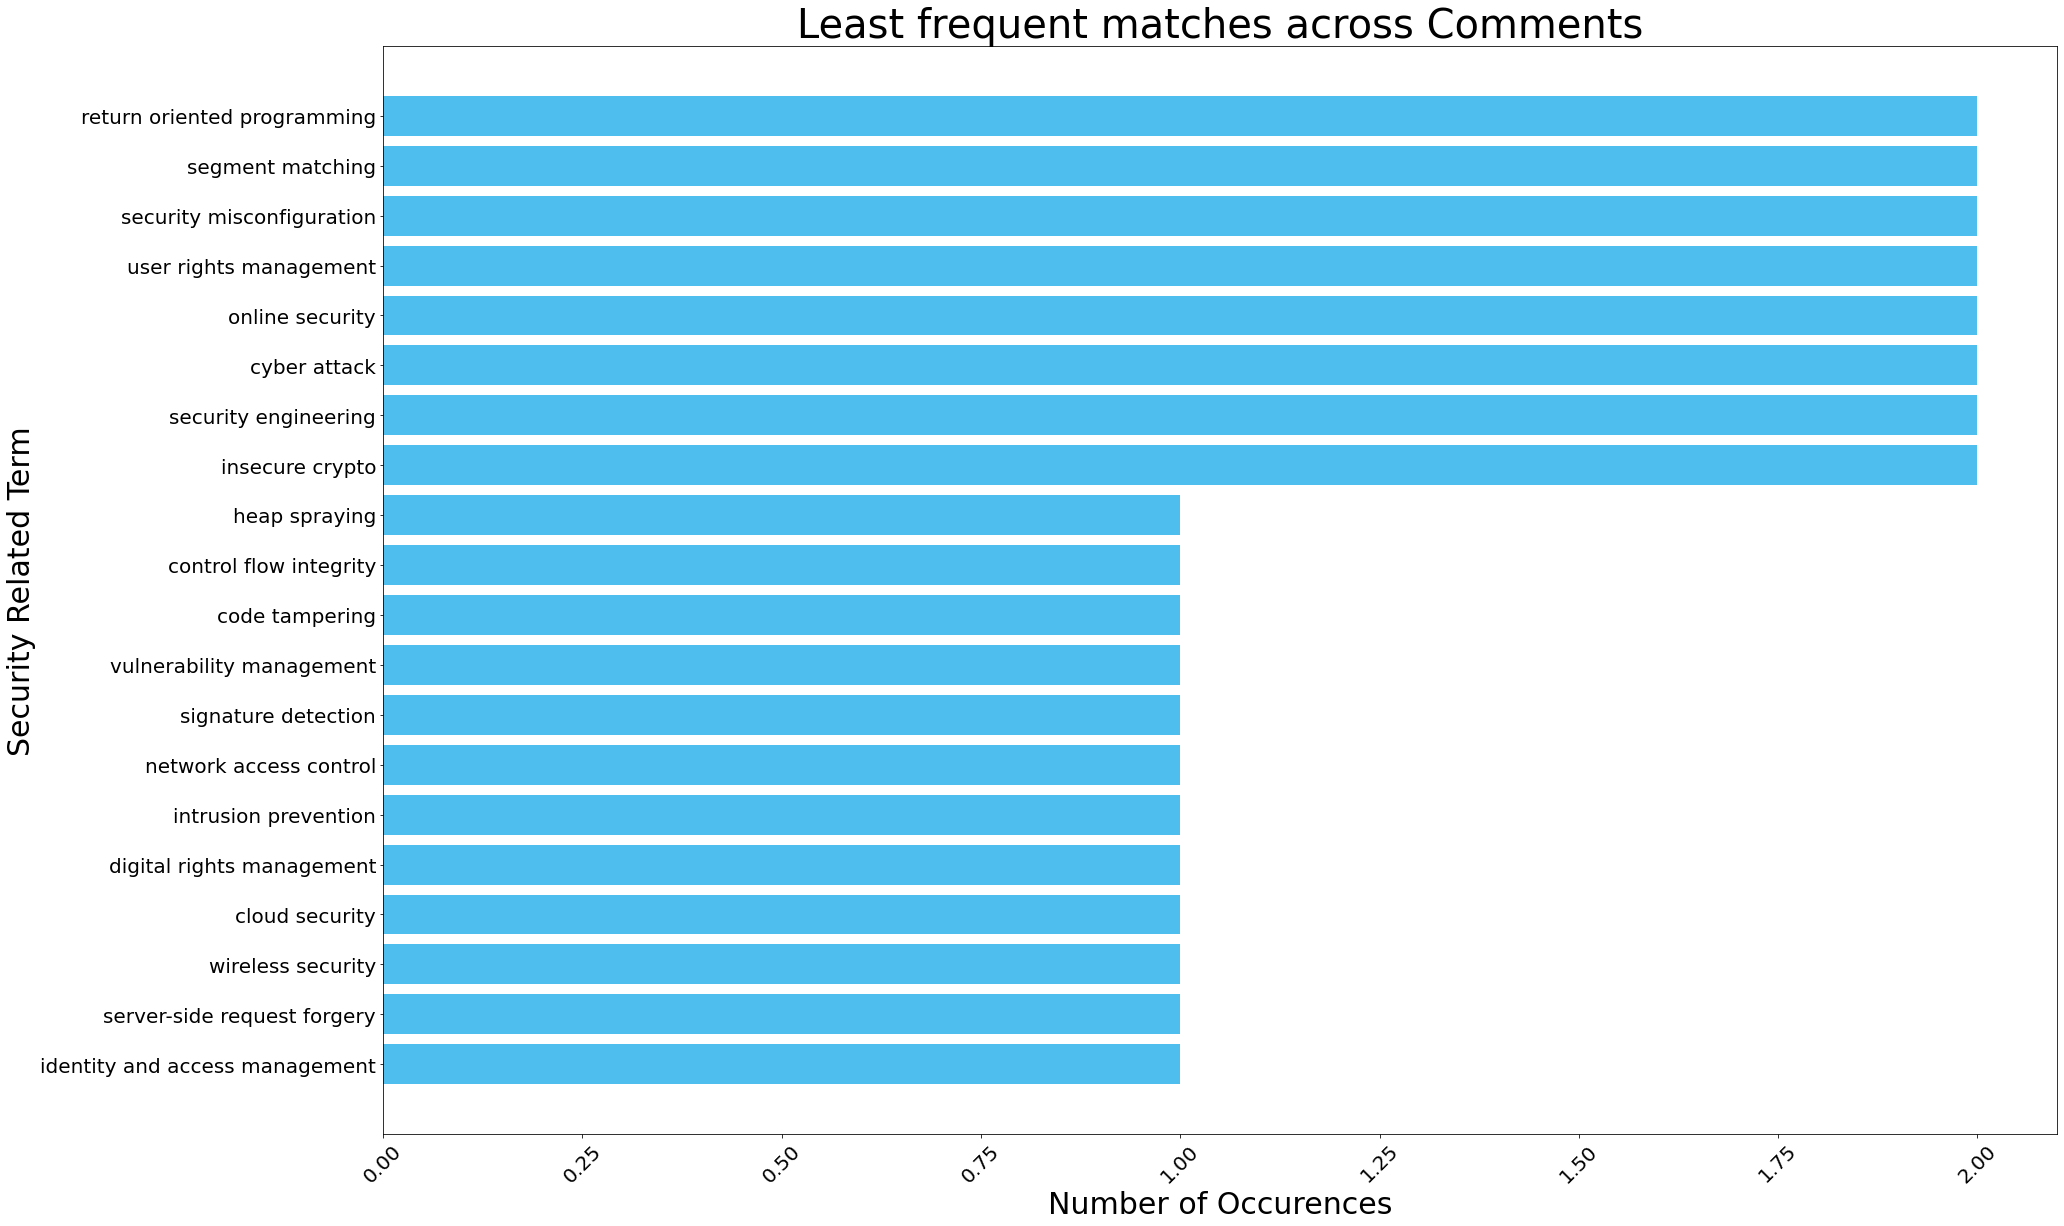

In [ ]:
plt.figure(figsize = (30, 20))
plt.barh(comments_low_freq["matches"], comments_low_freq["num_matches"], color = "#4DBEEE")
plt.title("Least frequent matches across Comments", fontsize=40)
plt.xlabel("Number of Occurences", fontsize=30)
plt.ylabel("Security Related Term", fontsize=30)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Analysis 

These three graphs show the least common matches in our sampled dataset. These terms are more specific towards more targeted security attacks and defenses. In another iteration of this project, it may be interesting to score each post with a relative secuirty score instead of looking for eact matches. We could use these results to put different weights on certain matches that indicate more or less of a security post. For example, since key-value pair might not be weighted as much as heap spraying when rating how a post's security score. 

## When were Security Topics talked about? 

### When were people talking about Spectre Attacks?

In [ ]:
%%bigquery spectre_attack_popularity --project $project_id

WITH terms AS ( SELECT 'r\'spectre|transient attacks|speculative execution|mispredicted branch|cache flood|side-channel attacks|branch target injection| gpz varient\'' as regex_str)


  SELECT  EXTRACT(YEAR FROM comments.creation_date) as time_of_creation, COUNT(*) as count
  FROM (SELECT * FROM `bigquery-public-data.stackoverflow.comments` TABLESAMPLE SYSTEM (60 PERCENT)) AS comments, terms
  WHERE (REGEXP_CONTAINS(comments.text, terms.regex_str))
  GROUP BY time_of_creation
  ORDER BY time_of_creation ASC

Query is running:   0%|          |

Downloading:   0%|          |

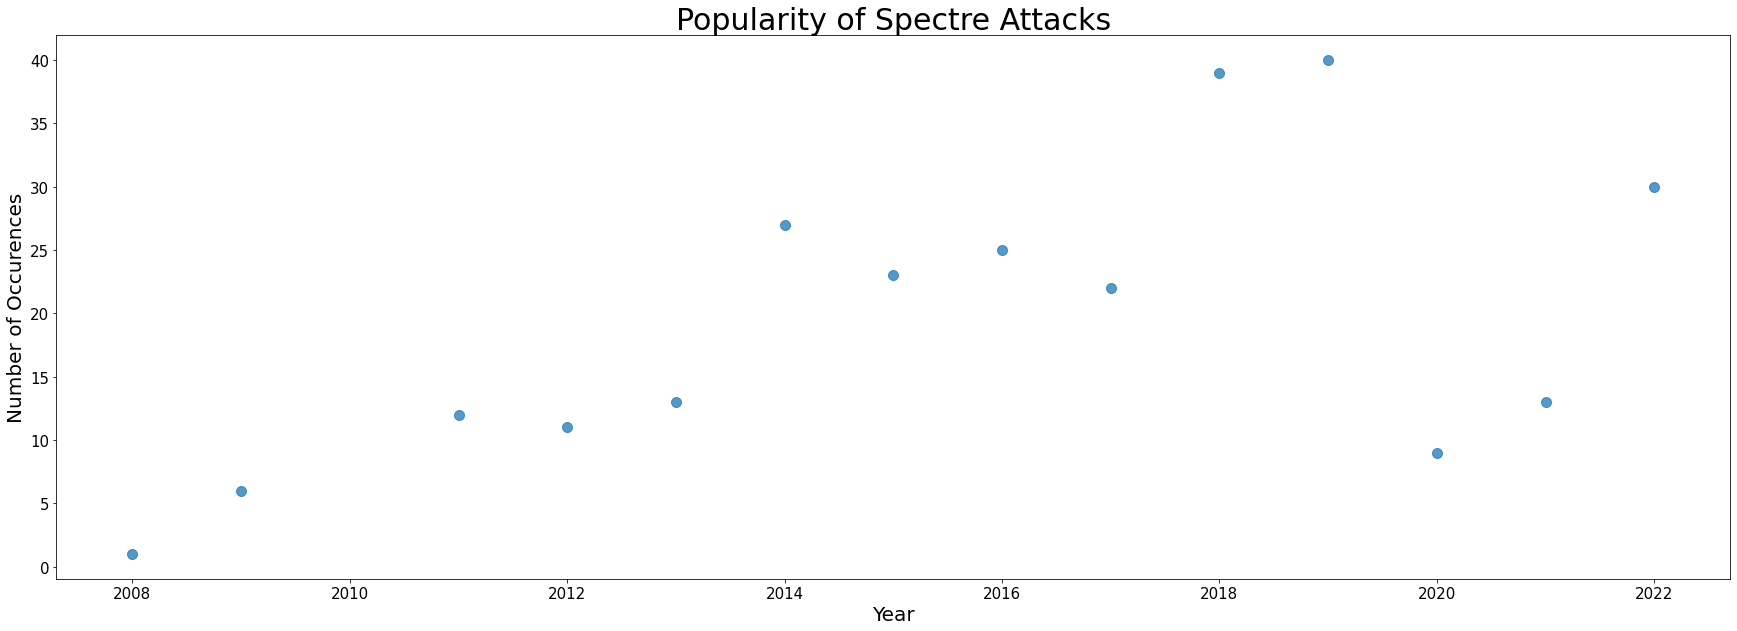

In [ ]:
plt.figure(figsize = (30, 10))
plt.scatter(spectre_attack_popularity["time_of_creation"], spectre_attack_popularity["count"], s=100, alpha =0.75)
plt.title("Popularity of Spectre Attacks", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Occurences", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Analysis

One particular set of attacks that I find interesting are spectre attacks. Since these are more recently discoverd, I was curiious how the presence of words associated with Spectre attacks would change over time and if there was a correlation with when the attakcs were more widley known and researched. As one might expect, the terms associated with Spectre attacks become more common over time, as they become more widely known and studied. Interestingly, the peak presence was in 2018/2019 which makes sense because Spectre attacks were first publicly discovered around that time. 

# Machine Learning Predictions


In [ ]:
# Run this cell to create a dataset to store your model, or create in the UI

model_dataset_name = 'bqml_stackoverflow'

dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('calcium-land-364517', 'bqml_stackoverflow'))

Extracting traning data from BitQuery

In [ ]:
%%bigquery --project $project_id

WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)



SELECT IF(score > 2, 1, 0) AS Label, title, answer_count, comment_count, last_activity_date, favorite_count, post_type_id, view_count, REGEXP_CONTAINS(q.body, terms.regex_str) AS security_presence, creation_date
FROM  (SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE  SYSTEM (10 PERCENT)) AS q, terms
WHERE score <> 0 
LIMIT 10


Query is running:   0%|          |

Downloading:   0%|          |

,Label,title,answer_count,comment_count,last_activity_date,favorite_count,post_type_id,view_count,security_presence,creation_date
0,0,"How to use nested ""map""",2,0,2020-10-04 10:24:48.673000+00:00,<NA>,1,256,False,2020-10-03 11:08:52.807000+00:00
1,0,gh-pages script cannot commit .nojekyll to GitHub,1,0,2021-06-08 11:51:34.657000+00:00,<NA>,1,256,False,2020-10-06 18:49:10.107000+00:00
2,0,How to load external script on click (after pa...,0,0,2020-10-09 13:52:14.663000+00:00,<NA>,1,256,False,2020-10-09 13:52:14.663000+00:00
3,0,MATLAB: Separate a table according to the sepa...,1,0,2020-11-05 10:30:07.413000+00:00,<NA>,1,256,True,2020-10-10 06:56:00.517000+00:00
4,0,How does Youtube create the small window playe...,1,0,2020-10-13 15:25:26.943000+00:00,<NA>,1,256,False,2020-10-13 15:16:26.693000+00:00
5,0,Read MS-Exchange emails from a custom folder u...,2,0,2022-05-05 13:35:49.080000+00:00,<NA>,1,256,True,2020-10-14 03:53:34.790000+00:00
6,0,Why is the hatch not showing?,1,0,2020-10-14 20:08:19.343000+00:00,<NA>,1,256,False,2020-10-14 19:54:38.037000+00:00
7,0,How to make div elements appear inline with a ...,3,0,2020-10-15 10:33:08.513000+00:00,<NA>,1,256,False,2020-10-15 00:10:51.043000+00:00
8,0,Getting the pixel under the mouse in TImage wi...,1,0,2020-10-16 14:53:14.390000+00:00,<NA>,1,256,False,2020-10-16 14:27:31.390000+00:00
9,0,Best practice when sharing data/models between...,1,0,2020-10-19 10:33:06.640000+00:00,1,1,256,True,2020-10-19 04:29:01.913000+00:00


In [ ]:
%%bigquery --project $project_id

CREATE MODEL `bqml_stackoverflow.prediction`
OPTIONS(model_type='logistic_reg') AS
SELECT
  t.Label AS label,  # if ground_truth is NULL then label is 0, else 1
  t.title AS feature1,         # converts NULL values to ""
  t.answer_count AS feature2,
  t.last_activity_date AS feature3,
  t.favorite_count  AS feature4,
  t.post_type_id  AS feature5,
  t.score  AS feature6,
  t.security_presence  AS feature7,
   t.creation_date  AS feature8,
FROM
    (WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)

SELECT IF(view_count > 2500, 1, 0) AS Label, title, answer_count, comment_count, last_activity_date, favorite_count, post_type_id, score, REGEXP_CONTAINS(q.body, terms.regex_str) AS security_presence, creation_date
FROM  (SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE  SYSTEM (20 PERCENT)) AS q, terms
WHERE view_count <> 0  
    ) t
WHERE EXTRACT(YEAR from creation_date) BETWEEN 2016 and 2018

Executing query with job ID: 99e2380b-1f32-4612-a099-12092425d981
Query executing: 2.90s


ERROR:
 400 Input data doesn't contain any rows.

Location: US
Job ID: 99e2380b-1f32-4612-a099-12092425d981



In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_stackoverflow.prediction`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,19,2.689650e-07,NaN,104857.6,1886
1,0,18,5.379303e-07,NaN,52428.8,1958
2,0,17,1.075862e-06,NaN,26214.4,2010
3,0,16,2.151730e-06,NaN,13107.2,2111
4,0,15,4.303488e-06,NaN,6553.6,1935
5,0,14,8.607093e-06,NaN,3276.8,2101
6,0,13,1.721467e-05,NaN,1638.4,2126
7,0,12,3.443136e-05,NaN,819.2,2221
8,0,11,6.887093e-05,NaN,409.6,2132
9,0,10,1.377752e-04,NaN,204.8,1891


In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_stackoverflow.prediction`, (
SELECT
   t.Label AS label,  # if ground_truth is NULL then label is 0, else 1
  t.title AS feature1,         # converts NULL values to ""
  t.answer_count AS feature2,
  t.last_activity_date AS feature3,
  t.favorite_count  AS feature4,
  t.post_type_id  AS feature5,
  t.score  AS feature6,
  t.security_presence  AS feature7,
   t.creation_date  AS feature8,
FROM
    (WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)

SELECT IF(view_count > 2500, 1, 0) AS Label, title, answer_count, comment_count, last_activity_date, favorite_count, post_type_id, score, REGEXP_CONTAINS(q.body, terms.regex_str) AS security_presence, creation_date
FROM  (SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE  SYSTEM (20 PERCENT)) AS q, terms
WHERE view_count <> 0  
    ) t
WHERE
  EXTRACT(YEAR from creation_date) BETWEEN 2008 and 2016 ))


Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.833136,0.133478,0.812894,0.230092,0.45972,0.747074


In [ ]:
%%bigquery --project $project_id

SELECT
predicted_label, label as real_label, feature1 as title, feature2 as answer_count, feature3 as last_activity_date, feature4 as favorite_count, feature5 as post_type_id, feature6 as score, feature7 as security_presence, feature8 as creation_date
FROM
  ML.PREDICT(MODEL `bqml_stackoverflow.prediction`, ( 
SELECT
  t.Label AS label, 
  t.title AS feature1,      
  t.answer_count AS feature2,
  t.last_activity_date AS feature3,
  t.favorite_count  AS feature4,
  t.post_type_id  AS feature5,
  t.score  AS feature6,
  t.security_presence  AS feature7,
  t.creation_date  AS feature8,
FROM
 (WITH terms AS ( SELECT 'r\'control hijack|buffer overflow|integ overflow|format string vulner|use after free|nop slide|heap spray|shellcod|fuzz|doubl free|arbitrari memori|return orient program|canari extract|extract aslr|control flow integr|privileg separ|access control|process isol|restrict secur context|confin|chroot|jail|hypervisor|covert channel|softwar fault isol|segment match|cross domain call|static analysi|dynam analyisi|fuzz|same origin polici|cross-origin resourc share|cross-sit request forgeri|cor|csrf|sql inject|cross site script|cooki theft|content secur polici|clickjack|third-parti content safeti|sub-resourc integr|phish|secur key|transport layer secur|stream cipher|wrong issuanc|man in the middl|mitm|spectr|indirect branch|meltdown|rogu inflight data load|ridl|fallout|zombieload|store-to-leak forward|micro-op cach|hijack|dn spoof|spoof|dn rebind|denial of servic|do flood|udp amplifi|mirai|malwar|password guess|intrus detect|signatur detect|anomali detect|privaci|censorship|decoy rout|threat model|password hash|encrypt|eavesdrop|unauthor intent receipt|intent spoof|secur alert|revers engin|code tamper|broken authent|broken session manag|insecur direct object refer|secur misconfigur|insecur crypto|out-of-bound write|code inject|server-sid request forgeri|ssrf|miss authent|miss author|improp authent|access control|antiviru|authent|blacklist|breach|cipher|encrypt|firewal|hash|intrus detect|intrus prevent|malwar|password|phish|public key|privat key|risk assess|secur polici|spam|spywar|viru|whitelist|two-factor authent|encapsul|access point|asymmetr encrypt|biometr authent|cryptographi|cyber attack|cybersecur|data backup|data protect|digit certif|digit signatur|disast recoveri|end-to-end encrypt|firewal rule|honeypot|ident and access manag|inform secur|key manag|malici code|network secur|onlin secur|patch manag|penetr test|perimet secur|physic secur|public key infrastructur|risk manag|secur inform and event manag|secur oper center|secur protocol|secur token|system secur|threat intellig|threat model|trojan hors|virtual privat network|vulner assess|web secur|wireless secur|zero-day exploit|certif author|cloud secur|cyber insur|data loss prevent|digit right manag|encapsul secur|encrypt file system|endpoint secur|feder ident|ident feder|ident manag|inform assur|inform secur manag system|key-valu pair|network access control|public key cryptographi|secur architectur|secur engin|secur govern|secur inform manag|secur incid|secur manag|social engin|strong password|system harden|threat detect|two-step verif|user authent|user right manag|virtual secur|vulner manag|web applic secur|white hat hacker|worm|zero-knowledg proof|secur|secur risk|protect|inform secur|cyber threat|onlin secur|global cybersecur|digit secur|person cybersecur|webcont secur|window 10 : ad new featur to help keep your data secur|data privaci|firewal|anti-viru softwar|intrus prevent system|hack|data theft|malwar analysi and remov softwar\'' as regex_str)

SELECT IF(view_count > 2500, 1, 0) AS Label, title, answer_count, comment_count, last_activity_date, favorite_count, post_type_id, score, REGEXP_CONTAINS(q.body, terms.regex_str) AS security_presence, creation_date
FROM  (SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` TABLESAMPLE  SYSTEM (20 PERCENT)) AS q, terms
WHERE view_count <> 0  
    ) t
WHERE
  EXTRACT(YEAR from creation_date) BETWEEN 2018 and 2023 ))
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,predicted_label,real_label,title,answer_count,last_activity_date,favorite_count,post_type_id,score,security_presence,creation_date
0,0,0,Different behavior of QSqlQueryModel for refre...,1,2020-04-17 14:19:55.347000+00:00,1,1,0,True,2020-04-13 07:47:02.113000+00:00
1,0,0,a problem when using shared preference's plugin,2,2020-04-13 09:59:22.430000+00:00,<NA>,1,-1,False,2020-04-13 09:31:54.233000+00:00
2,0,0,How to get the pre-condition of each test with...,2,2021-05-12 20:48:05.883000+00:00,<NA>,1,0,False,2020-04-13 17:01:04.277000+00:00
3,0,0,failed to dowload pdf from binary string retur...,1,2020-04-14 22:27:48.130000+00:00,<NA>,1,-2,False,2020-04-14 22:13:15.013000+00:00
4,0,0,React / JS how to detect if component is being...,2,2020-04-15 14:25:43.650000+00:00,<NA>,1,-1,False,2020-04-15 02:27:53.987000+00:00
5,0,0,Cannot install Flask or Pyodbc,1,2020-04-16 09:34:43.367000+00:00,<NA>,1,0,True,2020-04-16 01:23:18.117000+00:00
6,0,0,Fill empty cell and rename column name of the ...,1,2020-04-16 07:34:34.083000+00:00,<NA>,1,1,False,2020-04-16 07:05:07.650000+00:00
7,0,0,Additional discount not showing in invoice line,1,2020-06-04 11:25:29.323000+00:00,<NA>,1,0,True,2020-04-16 10:24:47.060000+00:00
8,0,0,Update Plotly and adjust reactive values,0,2020-04-16 14:13:03.230000+00:00,<NA>,1,1,True,2020-04-16 13:12:51.957000+00:00
9,0,0,Akka streams: Simulating a failed stream with ...,1,2020-04-17 07:54:21.930000+00:00,<NA>,1,3,False,2020-04-16 21:43:12.697000+00:00


## Analysis 

Since Stackoverflow is a great platfrom for computer scienctist to connect to a greater audience to ask and answer questions, we wanted to see how security content plays a roll in reaching a broader audience. We wanted to use our exploration to predict whether a post reaches a wide audince. Our model has with a 81.3% accuracy when predicting if a question reaches a wide audience (has a view count > 2500). We use various features that we believe would impact whether a post reaches a wide audience including the presence of security content, score, favorit_count, last_activity_date, creation_date, answer_count. From our previous queries, we have seen that on average have a higher view count than non-secuirty posts so this is an important feature to include. Addtionally, having a high score probably has a strong corelation with view_count since more people are able to score it. Additionally, the greater difference between creation_date and last_activity_date might indicate more long-term traffic within the post, which would correlate to having an increased view_count. 

# Conclusions


**What have you learned?**

This project has been amazing because we had the opportunity to combine the skils and knowledge we have gained through both this class and our computer security class. Through this project, we learned how to work with large datasets to gain meaningful insights. We acquanted ourselves with a common problem -- too much data and not enough compute power. Through this, we learned how to ask the right questions and found workarounds such as sampling datasets to answer our big question within our limitations. Additionally, we learned about natural language processing and how we can use stemming and ChatGPT to accurately search for security-related topics. We really enjoyed learning this new skill outside of any of our classes and applying it to our dataset. Ultimately, in this project, we dealt with common challenges, followed our curiosities, and learned new skills -- it has been a wonderful introduction to the real world of databases.


**What conclusions have you made or been unable to make about your dataset and why?**

We have made conclusions regarding the presence of security-related topics throughout StackOverflow. Here are some key takeaways:

*   Most of the security-related content on threads comes from someone bringing it up in an answer.
*   php|sql, java and android have the most the security-related content. 
*   Answers and comments with security-related content are more popular than non-security content. However, for questions, the opposite is true. 
*   On average, security questions have a higher watch count than non-security questions.
*   Common words like password, hash, encryption fall among the top most common security topics across questions, answers and comments.
*   People talk about security more when there is a related recent indicent (i.e. Spectre attacks).
*   Using information about security presence on a question, our model has with a 81.3% accuracy when predicting if a question reaches a wide audience (has a view count > 2500). 

The two largest barriers to our ability to gain insights from this database are lack of data and compute power. For lack of data, we couldn't see the age of users and the users associated with each comment or answer. This prevented us from gaining insight on the potential experience levels of security-focused users based on age. Additionally, we could not see if security-focused users make security-related answers and comments (which we know is the source of the majority of security-related content on the thread). For compute power, we settled with sampling our data. This means that most of our claims are general, and in terms of percents rather than counts, which could be useful. Additionally, it is harder to match across databases since not all relevant information might be in the sampled databases. 


**What is obvious, and what did you not expect to see?**

One unexpected result was that while security containing questions score lower than non-security questions, they do have more view counts. we would have expected this two metrics to be similar since view count often correlates to having a higher score and vice versa since the more people view a post, the higher cance for more upvotes. But in this instance, more people saw the post on average but decided not to upvote it. This may be because many people landed on the post because of a question they searched, but realized it was out of scope or not directly related to their original quesiton and decdied not to upvote it. Therefore, this may indicate that people are not as likely to upvote secuirty content as non-security content.


**If you had more time, what other data exploration would you pursue?**

With more time, we may have wanted to develop our list of security words so that each post/ansers would get a security score rather than a true/false value of whether they contain at least one security word. This may lead to addtional interesting queries and findings since they would be more variance post to post of how much security content there is for each post. As mentioned earlier, we could use the most common and least common secuirty terms to place weights on each term in order to generate a security score for each type of post. For example, we could have a score from 0 to 100 where 100 would be the highest possible score a post could get and 0 indicating that no security content was present. A post that only contains the word "password" once would have a lower score than a post that contains the word "cross-site SQL injection" because password would have a lower weight than "cross-site SQL injection" because we give more security merit to the phrase "cross-site SQL injection" than the term "password" which occurs often and show less targeted security content. 

With this new setup, we could investigate further how a secuity score correlates to view count and score (how many upvotes). Additionally with this greater variance and flexibility in measuring security we can see a more detailed breakdown how what posts show the most secuirty content instead of just measuring if a post contains at least one term that signifies security content. 

